<a href="https://colab.research.google.com/github/Sanafamma/Machine-Learning-with-Python/blob/master/Machine_Learning_A_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`Building my First Machine Learning Model in Python `**

# ***Task 01: Classification Problem with different Classifiers***




**Importing Dependencies**


In [2]:
from sklearn import datasets, model_selection, metrics, tree   #importing Dependencies, for ML Algorithms
import pandas as pd                                            # for pre-processing of spreadsheet
from sklearn.preprocessing import StandardScaler               #normalization
import numpy as np                                             #to handle arrays or matrices of numerical Data
import matplotlib.pyplot as plt                                # for plots display
from sklearn.metrics import confusion_matrix                   #computes Confusion matrix in binary classification
from sklearn.naive_bayes import GaussianNB                     #implements the Gaussian Naive Bayes algorithm
from sklearn.linear_model import LinearRegression              # model relationship between variables     
from sklearn.model_selection import train_test_split           #for spliting dataset into training and Testing
from sklearn.metrics import mean_squared_error                 #calculate MSE b/w predicted and actual values in REGRESSION
from sklearn.ensemble import RandomForestClassifier            #implemetns random forest algortihm
from sklearn.svm import SVR                                    #implements support vector REGRESSION 
from sklearn.svm import SVC                                    #implements support vector classification   
from sklearn.neighbors import KNeighborsClassifier             #implements K-Nearest classifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #calculate MSE/MAE b/w target and predicted value


**Loading Dataset**

In [3]:
wine_data = datasets.load_wine()
df = pd.DataFrame(wine_data["data"], columns=wine_data["feature_names"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


**Lables**

In [4]:
target = wine_data["target"]
target

#Spliting the Data 
X_train, X_test, y_train, y_test= model_selection.train_test_split(df, target, test_size=0.2, random_state=0)
print("Training Dataset:", X_train.shape)
print("Test Dataset:", X_test.shape)

Training Dataset: (142, 13)
Test Dataset: (36, 13)


**Normalization before training a model**

In [5]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **Training Decision Tree**

In [6]:
#Training the model Decision Tree Classifier
classifier = tree.DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)
model
#predicting test data
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
#predicted model
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



0.9722222222222222

### **Confusion Matrix**

Text(0, 0.5, 'True')

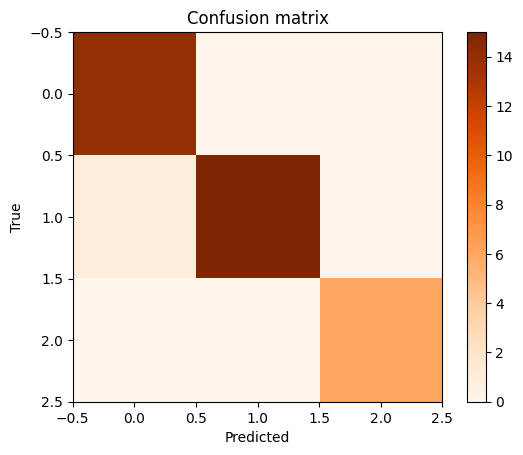

In [7]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Oranges', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xlabel('Predicted')
plt.ylabel('True')

## **Naiive Bayees Classifier**

In [8]:
classifier = GaussianNB()
model = classifier.fit(X_train, y_train)
model
#prediction of model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
#predicted model
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.81      0.90        16
           2       0.86      1.00      0.92         6

    accuracy                           0.92        36
   macro avg       0.91      0.94      0.92        36
weighted avg       0.93      0.92      0.92        36



0.9166666666666666

**Confusion** **Matrix**

Text(0, 0.5, 'True')

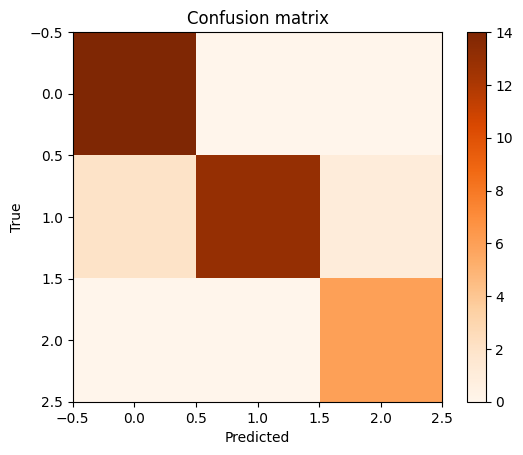

In [9]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Oranges', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xlabel('Predicted')
plt.ylabel('True')

##**K-Nearest Neighbour Classifier**

In [10]:
classifier = KNeighborsClassifier()
model = classifier.fit(X_train, y_train)
model
#prediction of model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
#predicted model
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



0.9722222222222222

**Confusion MAtrix**

Text(0, 0.5, 'True')

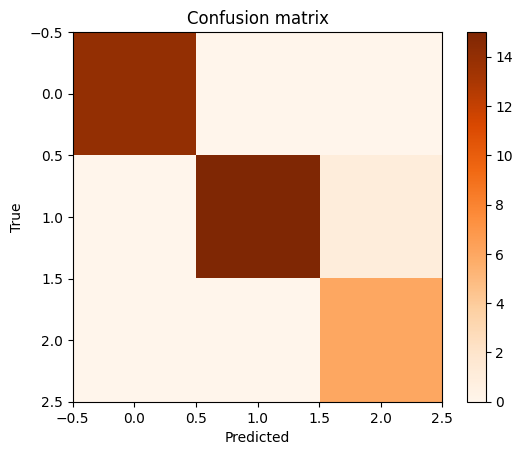

In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Oranges', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xlabel('Predicted')
plt.ylabel('True')

##**Random Forest Algorithm**

In [12]:
classifier = RandomForestClassifier()
model = classifier.fit(X_train, y_train)
model
#prediction
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



0.9722222222222222

**Confusion Matrix**

Text(0, 0.5, 'True')

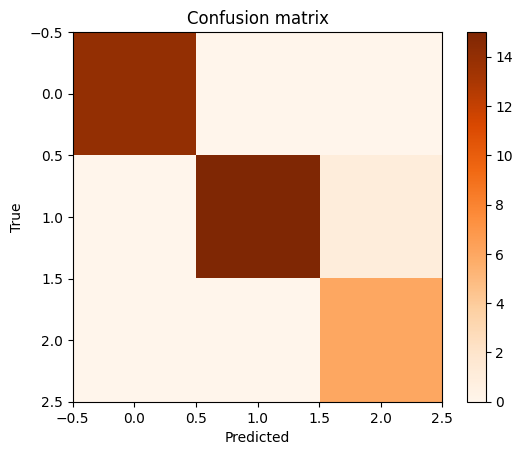

In [13]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Oranges', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xlabel('Predicted')
plt.ylabel('True')

##**Support Vector Machinne Classifier**

In [14]:
classifier = SVC()
model = classifier.fit(X_train, y_train)
model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



1.0

**Confusion Matrix**

Text(0, 0.5, 'True')

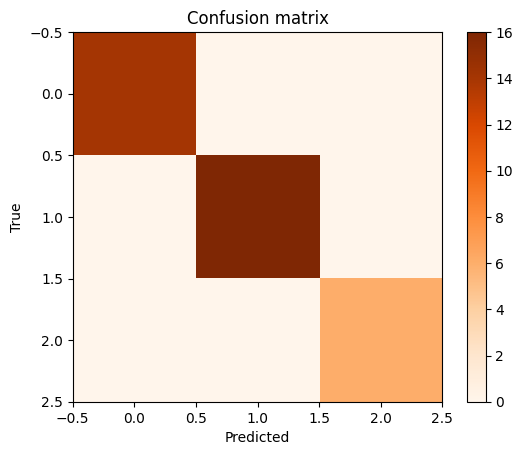

In [15]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.imshow(conf_mat, cmap='Oranges', interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xlabel('Predicted')
plt.ylabel('True')

#**Task 02: *i)* Classification "Cancer Dataset"   *ii)* Regression- "Walmart Dataset**

## **i) Clasification using different Classifiers**

**Loading Dataset**

In [ ]:
cancer_data = datasets.load_digits()
df = pd.DataFrame(cancer_data["data"], columns=cancer_data["feature_names"])
df.head()
target = cancer_data["target"]
target


**Spliting the Dataset into Training and Test**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df, target, test_size=0.2, random_state=0)
print("Training Dataset:", X_train.shape)
print("Test Dataset:", X_test.shape)

**Noarmalization of Dataset**

In [20]:
 #Standardize features by removing mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## **Decision Treee Classifier for Building model**


In [ ]:
classifier = tree.DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)
model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

## **Naive Bayees classifier**

In [ ]:
classifier = GaussianNB()
model = classifier.fit(X_train, y_train)
model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

## **K-Nearest Neighbour Algorithm**

In [ ]:
classifier = KNeighborsClassifier()
model = classifier.fit(X_train, y_train)
model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

## **Random Forest Classifier**

In [ ]:
classifier = RandomForestClassifier()
model = classifier.fit(X_train, y_train)
model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

## **Support Vector Machine**

In [ ]:
classifier = SVC()
model = classifier.fit(X_train, y_train)
model
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

## **ii) Regression Model**

**Importing Dependencies**

In [28]:
from sklearn import datasets, model_selection, metrics, tree   #importing ML algorithms
import pandas as pd                                             #pre-processing Dataset
from sklearn.svm import SVR                                     #for Support vector Regression
from sklearn.ensemble import GradientBoostingRegressor      #ensmeble kearning method
from keras.models import Sequential                             #a linear stack of layers
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split           #splitting
from sklearn.metrics import mean_squared_error                 #calculate MSE
from sklearn.ensemble import RandomForestRegressor             #implements RF for regression

**Loadind Dataset**

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment (1).csv')
column = list(df.columns) # Making a list out of column names
len_feature = len(column) # Length of column vector list
column


**Checking the features and variables of Dataset**


In [ ]:
X = df[column[0:len_feature-2]]
y = df[column[len_feature-2]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

**Spliting Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

## **Linear Regression code**

**Training Model**

In [ ]:
classifier = LinearRegression()
model = classifier.fit(X_train, y_train)
model

**Prediction**

In [44]:
# Prediction of target values
y_pred = model.predict(X_test)

**Mean absolute error and mean squared error**

In [ ]:
#calculating mean Absolute error and Mean Squared error
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

Printing Errors

In [53]:
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R-squared:", R2)

Mean Absolute Error: 282947.68759512587
Mean Squared Error: 123546565157.05841
Root Mean Squared Error: 351491.9133594092
R-squared: 0.9146454505152306


**Support Vector Regression**

In [52]:
classifier = SVR()
model = classifier.fit(X_train, y_train)
model
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R-squared:", R2)

Mean Absolute Error: 282947.68759512587
Mean Squared Error: 123546565157.05841
Root Mean Squared Error: 351491.9133594092
R-squared: 0.9146454505152306


**Gradeint Boosting Regressor Code**

In [51]:
classifier = GradientBoostingRegressor()
model = classifier.fit(X_train, y_train)
model
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R-squared:", R2)

Mean Absolute Error: 282947.68759512587
Mean Squared Error: 123546565157.05841
Root Mean Squared Error: 351491.9133594092
R-squared: 0.9146454505152306


**Random Forest Regressor**

In [50]:
classifier = RandomForestRegressor()
model = classifier.fit(X_train, y_train)
model
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R-squared:", R2)

Mean Absolute Error: 282947.68759512587
Mean Squared Error: 123546565157.05841
Root Mean Squared Error: 351491.9133594092
R-squared: 0.9146454505152306
